# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not

**Business Use Case:**
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

**Project Description:**
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//Pro ph 4//BANK MARKETING//termdeposit_train.csv")
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df_train.shape

(31647, 18)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

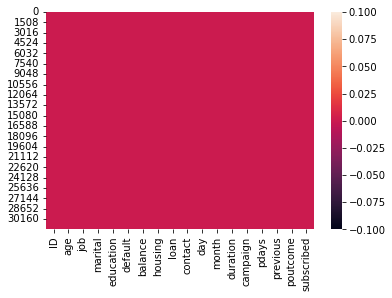

In [8]:
sns.heatmap(df_train.isnull())
plt.show()

In [10]:
# checking the value counts of each columns
for i in df_train.columns:
    print(df_train[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

No space in data, so we can conclude no null valve as per our operation

In [11]:
# seperating numerical and categorical columns
cat_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i]== 'object':
        cat_col.append(i)
print("categorical columns", cat_col)        

num_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical columns",num_col)        


categorical columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical columns ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
# drop ID column
df_train.drop('ID', axis=1, inplace=True)
df_train


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [13]:
df_train.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

In [15]:
#preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
le = LabelEncoder()

In [24]:
for i in cat_col:
    df_train[i] = le.fit_transform(df_train[i])
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [25]:
# scaling
col_sc = ['age',  'balance', 'day', 'duration', 'pdays', 'campaign', 'previous']

In [26]:
sc = StandardScaler()

In [28]:
for i in col_sc:
    df_train[[i]] = sc.fit_transform(df_train[[i]])
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,0,1,3,0,0.187933,0,0,1,0.379579,9,-0.832754,-0.245906,-0.408555,-0.237059,3,0
1,-0.937156,11,1,1,0,-0.449397,0,0,0,0.499526,5,-0.649957,-0.245906,-0.408555,-0.237059,3,0
2,-1.313627,7,1,1,0,-0.156159,1,0,0,0.259631,5,-0.070449,-0.567059,-0.408555,-0.237059,3,0
3,1.509911,4,0,2,0,0.635055,0,0,0,0.739422,6,2.368149,-0.567059,0.447299,1.001336,2,1
4,-0.937156,9,1,1,0,-0.411091,1,0,0,-1.419637,3,0.474054,-0.567059,-0.408555,-0.237059,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,4,2,2,0,-0.450388,1,0,0,-0.460055,8,-0.552724,-0.245906,-0.408555,-0.237059,3,0
31643,1.133439,4,0,2,0,-0.324903,0,1,0,-1.299690,6,0.699635,-0.245906,-0.408555,-0.237059,3,1
31644,-0.843038,4,2,2,0,-0.347358,0,0,0,-1.059794,1,-0.859979,0.075247,-0.408555,-0.237059,3,0
31645,1.509911,9,1,1,0,-0.376088,1,0,1,-0.100212,8,-0.918319,1.359859,2.994723,4.716521,0,0


In [34]:
df_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,3.164700e+04,31647.000000,31647.000000,31647.000000,31647.000000,3.164700e+04,31647.000000,31647.000000,31647.000000,3.164700e+04,31647.000000,3.164700e+04,3.164700e+04,3.164700e+04,3.164700e+04,31647.000000,31647.000000
mean,-3.574590e-16,4.332923,1.167220,1.225013,0.018485,1.928235e-16,0.555629,0.162132,0.644642,-1.394453e-16,5.533131,3.864574e-17,-4.442909e-16,7.050988e-16,1.617385e-15,2.566152,0.117389
std,1.000016e+00,3.271868,0.607186,0.749195,0.134700,1.000016e+00,0.496904,0.368578,0.899480,1.000016e+00,3.004247,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,0.982069,0.321888
min,-2.160689e+00,0.000000,0.000000,0.000000,0.000000,-3.098446e+00,0.000000,0.000000,0.000000,-1.779480e+00,0.000000,-1.003884e+00,-5.670587e-01,-4.085548e-01,-2.370587e-01,0.000000,0.000000
25%,-7.489197e-01,1.000000,1.000000,1.000000,0.000000,-4.262817e-01,0.000000,0.000000,0.000000,-9.398464e-01,3.000000,-5.993956e-01,-5.670587e-01,-4.085548e-01,-2.370587e-01,3.000000,0.000000
50%,-1.842121e-01,4.000000,1.000000,1.000000,0.000000,-3.017876e-01,1.000000,0.000000,0.000000,1.973545e-02,6.000000,-3.038079e-01,-2.459057e-01,-4.085548e-01,-2.370587e-01,3.000000,0.000000
75%,6.628494e-01,7.000000,2.000000,2.000000,0.000000,2.216118e-02,1.000000,0.000000,2.000000,6.194741e-01,8.000000,2.348618e-01,7.524724e-02,-4.085548e-01,-2.370587e-01,3.000000,0.000000
max,5.086393e+00,11.000000,2.000000,3.000000,1.000000,3.327430e+01,1.000000,1.000000,2.000000,1.818951e+00,11.000000,1.812375e+01,1.934443e+01,8.371499e+00,1.132825e+02,3.000000,1.000000


In [29]:
x_train = df_train.drop('subscribed', axis=1)
y_train = df_train['subscribed']

In [31]:
df_test = pd.read_csv('C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//Pro ph 4//BANK MARKETING//termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [32]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [35]:
# seperating numerical and categorical columns
cat_col1 = []
for i in df_test.dtypes.index:
    if df_test.dtypes[i]== 'object':
        cat_col1.append(i)
print("categorical columns", cat_col1)        

num_col1 = []
for i in df_test.dtypes.index:
    if df_test.dtypes[i] != 'object':
        num_col1.append(i)
print("Numerical columns",num_col1)        


categorical columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [37]:
# drop ID column
df_test.drop('ID', axis=1, inplace=True)
df_test


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [38]:
# label encoding
for i in cat_col1:
    df_test[i] = le.fit_transform(df_test[i])
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [39]:
# scaling
for i in col_sc:
    df_test[[i]] = sc.fit_transform(df_test[[i]])
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,7,1,1,0,-0.402389,1,0,0,-0.089124,8,-0.921849,1.058702,-0.418199,-0.297500,3
1,3.499987,5,0,0,0,0.463375,0,0,1,-1.778340,5,0.439963,-0.574850,-0.418199,-0.297500,3
2,-0.932421,6,2,2,0,-0.393955,1,0,2,0.031534,8,1.616074,-0.574850,-0.418199,-0.297500,3
3,1.519549,7,2,0,0,0.784508,1,0,1,-0.330440,8,-0.747754,-0.248140,-0.418199,-0.297500,3
4,0.387871,1,0,1,0,-0.669352,0,1,2,-1.537023,5,-0.569789,-0.574850,-0.418199,-0.297500,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,4,1,2,0,-0.426069,0,0,0,1.479434,1,-0.426644,0.405281,-0.418199,-0.297500,3
13560,1.236630,1,1,0,0,0.299239,1,0,2,0.514168,6,-0.387957,-0.574850,-0.418199,-0.297500,3
13561,-0.555195,5,1,0,0,-0.348218,1,0,0,1.600092,4,-0.473070,-0.574850,-0.418199,-0.297500,3
13562,-1.121034,0,2,1,0,-0.290155,0,0,0,-0.813073,9,-0.194517,-0.248140,0.483926,1.203911,2


In [40]:
x_test = df_test

In [41]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

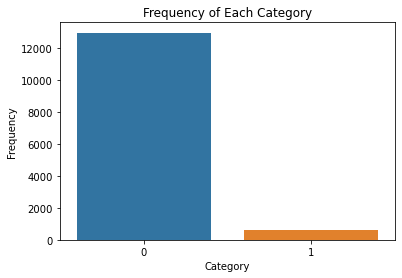

In [53]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [54]:
# Random forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

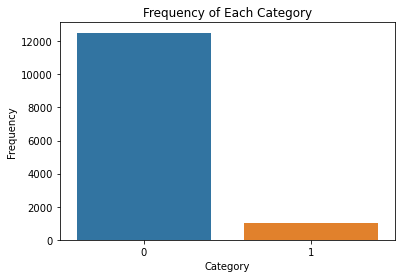

In [55]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [56]:
# Extra tree classifier
etc = ExtraTreeClassifier()
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
pred

array([0, 0, 1, ..., 0, 1, 0])

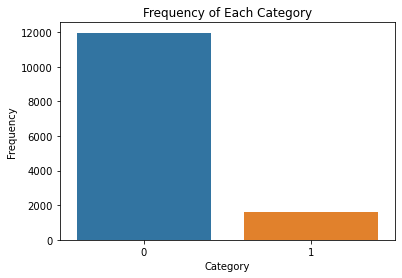

In [57]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [58]:
# support vector classifier
svc=SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

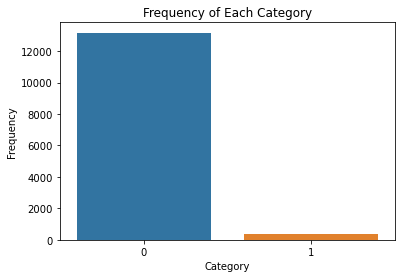

In [59]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [60]:
# Gradient boosting
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

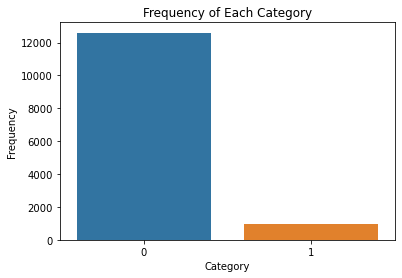

In [61]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [62]:
# Adaptive boost
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred = abc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

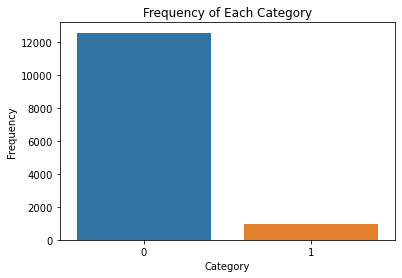

In [63]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()

In [64]:
# Bagging classifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred = bc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

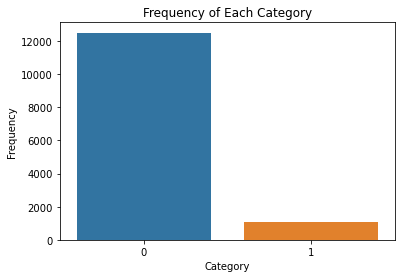

In [65]:
# Create a DataFrame to count the frequency of each category
df = pd.DataFrame(pred, columns=['Subscribed'])

# Create a bar plot
sns.countplot(x='Subscribed', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Each Category')

# Display the plot
plt.show()